# Загрузка библиотек и подключение к Google диску


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Загрузка датасета , первичная обработка и EDA

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Курсовая/diabetes.csv")

In [ ]:
df.columns # Беременность», «Глюкоза», «Артериальное давление», «Толщина кожи», «Инсулин», «ИМТ», «Функция родословной диабета», «Возраст», «Исход диабета"

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Смена названия столбцов для удобства 

In [ ]:
df = df.rename(columns={
    'Pregnancies': 'беременность',
    'Glucose': 'глюкоза',
    'BloodPressure': 'артериальное давление',
    'SkinThickness': 'толщина кожи',
    'Insulin': 'инсулин',
    'BMI': 'индекс массы тела',
    'DiabetesPedigreeFunction': 'DiabetesPedigreeFunction', 
    'Age': 'возраст',
    'Outcome': 'исход диабета'
})

In [ ]:
df.shape #размер датасета

(768, 9)

In [ ]:
df.dtypes  #тип данных в датасенте 

беременность                  int64
глюкоза                       int64
артериальное давление         int64
толщина кожи                  int64
инсулин                       int64
индекс массы тела           float64
DiabetesPedigreeFunction    float64
возраст                       int64
исход диабета                 int64
dtype: object

График отношения глюкозы к инсулину

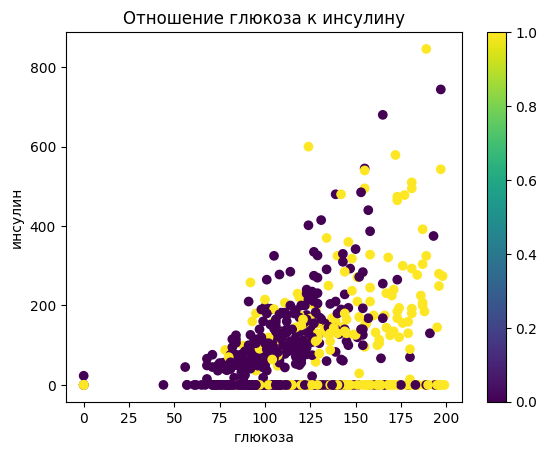

In [ ]:
glucose = df['глюкоза']
insulin = df['инсулин']
diabetes = df['исход диабета']

plt.scatter(glucose, insulin, c=diabetes, cmap='viridis')
plt.xlabel('глюкоза')
plt.ylabel('инсулин')
plt.title('Отношение глюкоза к инсулину')
plt.colorbar()
plt.show()

График процента людей с уровнем глюкозы меньше 126 и возраста до 50 лет

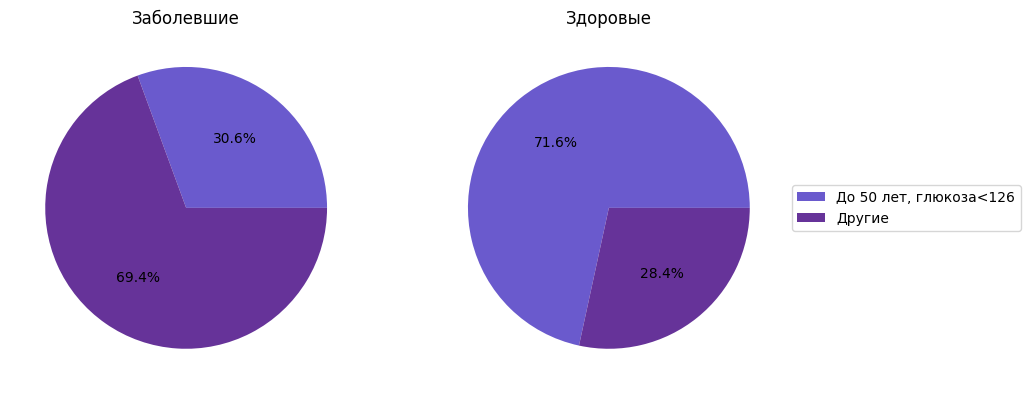

In [ ]:
col =['slateblue', 'rebeccapurple','#CF5C36','lightblue','magenta', '#FF5D73','#F2D7EE','mediumturquoise']

df_diabetic = df[df['исход диабета'] == 1]
df_healthy = df[df['исход диабета'] == 0]

df_diabetic_age = df_diabetic[(df_diabetic['возраст'] < 50) & (df_diabetic['глюкоза'] < 126)]
df_healthy_age = df_healthy[(df_healthy['возраст'] < 50) & (df_healthy['глюкоза'] < 126)]

diabetic_data = [len(df_diabetic_age), len(df_diabetic) - len(df_diabetic_age)]
healthy_data = [len(df_healthy_age), len(df_healthy) - len(df_healthy_age)]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].pie(diabetic_data, labels=None, autopct='%1.1f%%', colors=col)
axs[0].set_title('Заболевшие')

axs[1].pie(healthy_data, labels=None, autopct='%1.1f%%', colors=col)
axs[1].set_title('Здоровые')

plt.axis('off')
plt.legend(['До 50 лет, глюкоза<126', 'Другие'], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Анализ, чтобы понять уровень глюкозы измеренн на тощак или нет, по диаграмме видно, что менее 4% женщин болеющих диабетом имеют уровень глюкозы не на тощак менее, чем 200, следовательно данные взять на тощак

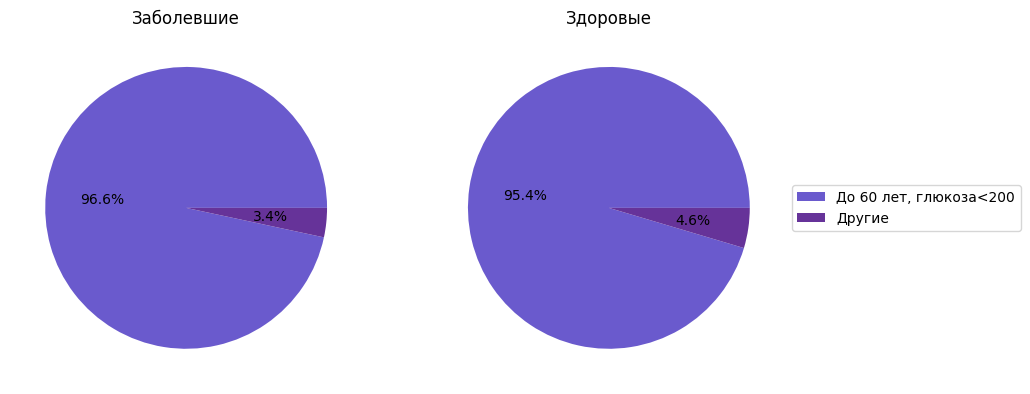

In [ ]:
col =['slateblue', 'rebeccapurple','#CF5C36','lightblue','magenta', '#FF5D73','#F2D7EE','mediumturquoise']

df_diabetic = df[df['исход диабета'] == 1]
df_healthy = df[df['исход диабета'] == 0]

df_diabetic_age = df_diabetic[(df_diabetic['возраст'] < 60) & (df_diabetic['глюкоза'] < 200)]
df_healthy_age = df_healthy[(df_healthy['возраст'] < 60) & (df_healthy['глюкоза'] < 200)]

diabetic_data = [len(df_diabetic_age), len(df_diabetic) - len(df_diabetic_age)]
healthy_data = [len(df_healthy_age), len(df_healthy) - len(df_healthy_age)]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].pie(diabetic_data, labels=None, autopct='%1.1f%%', colors=col)
axs[0].set_title('Заболевшие')

axs[1].pie(healthy_data, labels=None, autopct='%1.1f%%', colors=col)
axs[1].set_title('Здоровые')

plt.axis('off')
plt.legend(['До 60 лет, глюкоза<200', 'Другие'], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

График распределения значения DiabetesPedigreeFunction среди здоровых и больных людей

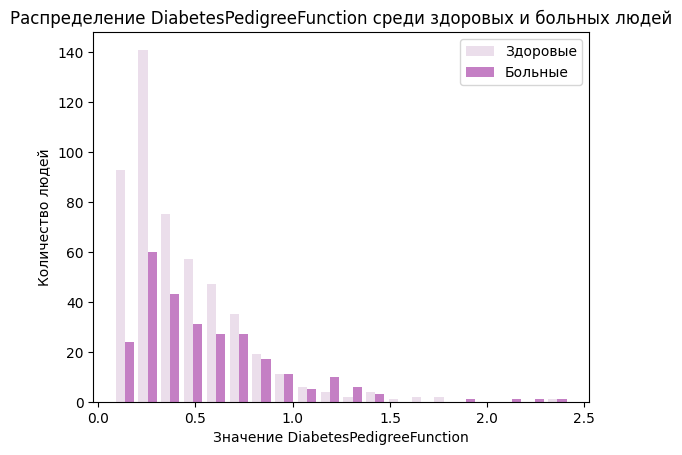

In [ ]:
healthy = df[df['исход диабета'] == 0]['DiabetesPedigreeFunction']
diabetic = df[df['исход диабета'] == 1]['DiabetesPedigreeFunction']

plt.hist([healthy, diabetic], bins=20, alpha=0.5, label=['Здоровые', 'Больные'], color = ["thistle", "darkmagenta"])

plt.legend(loc='upper right')
plt.xlabel('Значение DiabetesPedigreeFunction')
plt.ylabel('Количество людей')
plt.title('Распределение DiabetesPedigreeFunction среди здоровых и больных людей')

plt.show()


Диаграмма распределения возрастов в датасете 

In [ ]:
df["возраст"].max()  #макс возраст

81

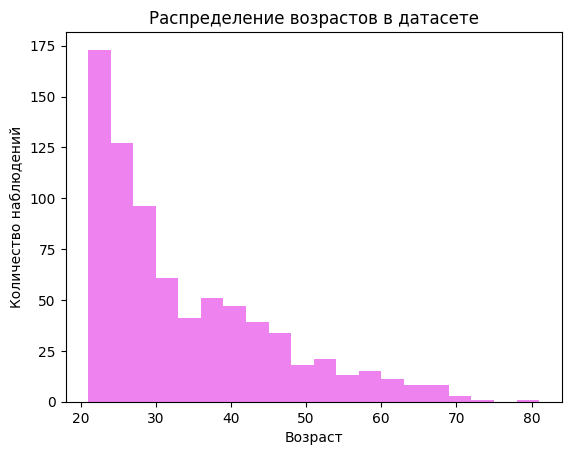

In [ ]:
ages = df["возраст"]
plt.hist(ages, bins=20, color = "violet")
plt.xlabel('Возраст')
plt.ylabel('Количество наблюдений')
plt.title('Распределение возрастов в датасете')
plt.show()

Диаграмма количества исходов диабета

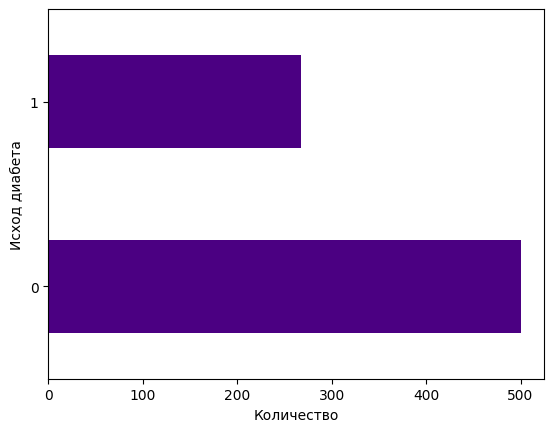

In [ ]:
counts = df["исход диабета"].value_counts()
ax = counts.plot.barh(color="indigo")
ax.set_xlabel("Количество")
ax.set_ylabel("Исход диабета")
plt.show()


In [ ]:
df.isnull().sum()  #проверка датасета на пропуски 

беременность                0
глюкоза                     0
артериальное давление       0
толщина кожи                0
инсулин                     0
индекс массы тела           0
DiabetesPedigreeFunction    0
возраст                     0
исход диабета               0
dtype: int64

In [ ]:
variables = ["глюкоза", "артериальное давление","толщина кожи", "инсулин","индекс массы тела"]  #перевод нулевых значений у определённых столбцов на пропуски
df[variables] = df[variables].replace(0,np.NaN)
df.isnull().sum()

беременность                  0
глюкоза                       5
артериальное давление        35
толщина кожи                227
инсулин                     374
индекс массы тела            11
DiabetesPedigreeFunction      0
возраст                       0
исход диабета                 0
dtype: int64

In [ ]:
num_zeros = (df == 0).sum()     # беременность оставляем 0 и исход диабета, всё остальное 0 не может быть 
print(num_zeros)

беременность                111
глюкоза                       0
артериальное давление         0
толщина кожи                  0
инсулин                       0
индекс массы тела             0
DiabetesPedigreeFunction      0
возраст                       0
исход диабета               500
dtype: int64


Заполнение строк средним значением 

In [ ]:
df["индекс массы тела"].fillna(df.groupby("исход диабета")["индекс массы тела"].transform("mean"), inplace=True)

In [ ]:
df["артериальное давление"].fillna(df.groupby("индекс массы тела")["артериальное давление"].transform("mean"), inplace=True)

In [ ]:
df["инсулин"].fillna(df.groupby("артериальное давление")["инсулин"].transform("mean"), inplace=True)

In [ ]:
df["толщина кожи"].fillna(df.groupby("возраст")["толщина кожи"].transform("mean"), inplace=True)


In [ ]:
df["глюкоза"].fillna(df.groupby("артериальное давление")["глюкоза"].transform("mean"), inplace=True)

In [ ]:
df.isnull().sum()

беременность                 0
глюкоза                      0
артериальное давление        1
толщина кожи                12
инсулин                     45
индекс массы тела            0
DiabetesPedigreeFunction     0
возраст                      0
исход диабета                0
dtype: int64

In [ ]:
df["артериальное давление"].fillna(df.groupby("исход диабета")["артериальное давление"].transform("mean"), inplace=True)
df["толщина кожи"].fillna(df.groupby("исход диабета")["толщина кожи"].transform("mean"), inplace=True)
df["инсулин"].fillna(df.groupby("исход диабета")["инсулин"].transform("mean"), inplace=True)


# Feature Engineering

In [ ]:
df.loc[(df['возраст'] >= 21) & (df['возраст'] <= 35), 'возрастной_период'] = 'зрелый1' 
df.loc[(df['возраст'] > 35) & (df['возраст'] <= 60), 'возрастной_период'] = 'зрелый2'
df.loc[(df['возраст'] > 60) & (df['возраст'] <= 75), 'возрастной_период'] = 'пожилой'
df.loc[(df['возраст'] > 75), 'возрастной_период'] = 'старческий'

In [ ]:
df["имс_по_показателям"] = pd.cut(x=df['индекс массы тела'], bins=[0, 16, 18.5, 25, 30, 35, 40, 100],labels=["выраженный_дифицит", "недостаточная_масса", "норма","избыточная_масса",
                                                                                  "ожирение1", "ожирение2", "ожирение3"])

In [ ]:
df.loc[(df["глюкоза"] < 100), 'уровень_глюкозы'] = "нормальный"
df.loc[(df['глюкоза'] >= 100) & (df['глюкоза'] < 126), 'уровень_глюкозы'] = "преддиабет"
df.loc[(df["глюкоза"] >= 126), 'уровень_глюкозы'] = "диабет"

In [ ]:
df.loc[(df["инсулин"] < 105), 'уровень_инсулина'] = "нормал"
df.loc[(df["инсулин"] >= 105), 'уровень_инсулина'] = "повышенный"

In [ ]:

df.loc[(df["артериальное давление"] < 120), 'уровень_арте_дав'] = "оптимальное"
df.loc[(df['артериальное давление'] >= 120) & (df['артериальное давление'] < 129), 'уровень_арте_дав'] = "нормальное"
df.loc[(df['артериальное давление'] >= 129) & (df['артериальное давление'] < 139), 'уровень_арте_дав'] = "высокое нормальное"
df.loc[(df["артериальное давление"] >= 139), 'уровень_арте_дав'] = "высокое"

In [ ]:
df["отношение_инсулина_к_глюкозе"] = df["инсулин"] / df["глюкоза"] 

In [ ]:
df.loc[(df["беременность"] <1 ), 'была_ли_беременность'] = "нет"
df.loc[(df["беременность"] >= 1), 'была_ли_беременность'] = "да"

In [ ]:
df1 = df.copy()

one-hot encoding

In [ ]:
#  категориальные признаки для one-hot encoding
ohe_cols = ['возрастной_период', 'имс_по_показателям', 'уровень_глюкозы', 'уровень_инсулина', 'уровень_арте_дав', 'была_ли_беременность']

df_encoded = pd.get_dummies(df1, columns=ohe_cols)

print(df_encoded.head())

   беременность  глюкоза  артериальное давление  толщина кожи     инсулин  \
0             6    148.0                   72.0          35.0  137.478261   
1             1     85.0                   66.0          29.0  137.400000   
2             8    183.0                   64.0          29.1  138.428571   
3             1     89.0                   66.0          23.0   94.000000   
4             0    137.0                   40.0          35.0  168.000000   

   индекс массы тела  DiabetesPedigreeFunction  возраст  исход диабета  \
0               33.6                     0.627       50              1   
1               26.6                     0.351       31              0   
2               23.3                     0.672       32              1   
3               28.1                     0.167       21              0   
4               43.1                     2.288       33              1   

   отношение_инсулина_к_глюкозе  ...  имс_по_показателям_ожирение3  \
0                     

In [ ]:
df_encoded1 = df_encoded.copy()


# Загрузка библиотек для обучения модели 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import torch.optim as optim



# Выделение эндогенной переменной и разделение на train и test

In [ ]:
X = df_encoded1.drop('исход диабета' , axis = 1)   #выделение эндогенной переменной 
y = df_encoded1['исход диабета'] 

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size =0.2,random_state=0) #разделение на тестовую и обучющую выборку

In [ ]:
X_train=torch.FloatTensor(X_train.values)  
X_test=torch.FloatTensor(X_test.values)
y_train=torch.LongTensor(y_train.values)
y_test=torch.LongTensor(y_test.values)

# Обучение модели ANN_model и её метрики качества

In [ ]:
class ANN_model(nn.Module):   #модель неройнной сети 
    def __init__(self,input_features=29,hidden1=20, hidden2=10,out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features,hidden1)
        self.f_connected2 = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2,out_features)
        
    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [ ]:
torch.manual_seed(19)
model = ANN_model()

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
num_epochs = 500
batch_size = 10

for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        # Прямой проход (forward pass)
        outputs = model(inputs)
        loss = loss_function(outputs, labels)

        # Обратное распространение ошибки (backward pass) и оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Вывод промежуточных результатов
    print(f'Эпоха [{epoch+1}/{num_epochs}], Потеря: {loss.item():.4f}')


Эпоха [1/500], Потеря: 0.5430
Эпоха [2/500], Потеря: 0.5395
Эпоха [3/500], Потеря: 0.4538
Эпоха [4/500], Потеря: 0.4336
Эпоха [5/500], Потеря: 0.4258
Эпоха [6/500], Потеря: 0.4168
Эпоха [7/500], Потеря: 0.4519
Эпоха [8/500], Потеря: 0.3910
Эпоха [9/500], Потеря: 0.2369
Эпоха [10/500], Потеря: 0.3650
Эпоха [11/500], Потеря: 0.3697
Эпоха [12/500], Потеря: 0.3631
Эпоха [13/500], Потеря: 0.3722
Эпоха [14/500], Потеря: 0.3814
Эпоха [15/500], Потеря: 0.4241
Эпоха [16/500], Потеря: 0.3964
Эпоха [17/500], Потеря: 0.4314
Эпоха [18/500], Потеря: 0.3975
Эпоха [19/500], Потеря: 0.3951
Эпоха [20/500], Потеря: 0.3602
Эпоха [21/500], Потеря: 0.3958
Эпоха [22/500], Потеря: 0.3808
Эпоха [23/500], Потеря: 0.3819
Эпоха [24/500], Потеря: 0.3756
Эпоха [25/500], Потеря: 0.3514
Эпоха [26/500], Потеря: 0.3888
Эпоха [27/500], Потеря: 0.4068
Эпоха [28/500], Потеря: 0.3905
Эпоха [29/500], Потеря: 0.3800
Эпоха [30/500], Потеря: 0.3685
Эпоха [31/500], Потеря: 0.3967
Эпоха [32/500], Потеря: 0.3464
Эпоха [33/500], П

In [ ]:
model.eval()

# Прямой проход для получения предсказаний
with torch.no_grad():
    test_outputs = model(X_test)

# Конвертация предсказаний в метки классов
_, predicted_labels = torch.max(test_outputs, 1)

# Конвертация тензоров PyTorch в списки
y_test = y_test.tolist()
predicted_labels = predicted_labels.tolist()

# Вычисление метрик
accuracy = accuracy_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Вывод результатов
print(f'Точность: {accuracy:.4f}')
print(f'Полнота: {recall:.4f}')
print(f'F1: {f1:.4f}')

Точность: 0.7208
Полнота: 0.9362
F1: 0.6718


In [ ]:
roc_auc = roc_auc_score(y_test, predicted_labels)
print(f'ROC-AUC: {roc_auc:.4f}')

ROC-AUC: 0.7812


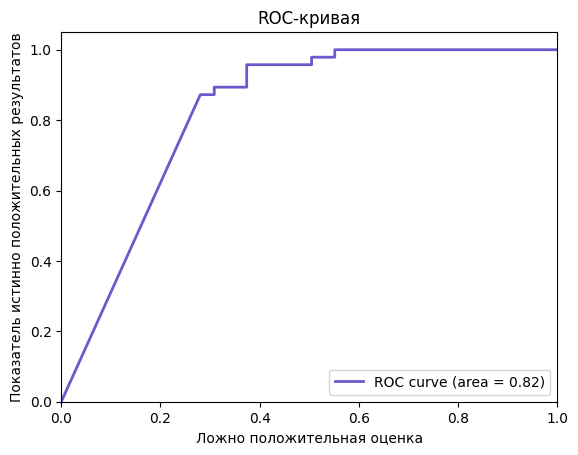

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Получение предсказанных вероятностей класса 1
predicted_probabilities = torch.softmax(test_outputs, dim=1)[:, 1]

# Вычисление значений для ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure()
plt.plot(fpr, tpr, color='slateblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложно положительная оценка')
plt.ylabel('Показатель истинно положительных результатов')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

График обучения модели 

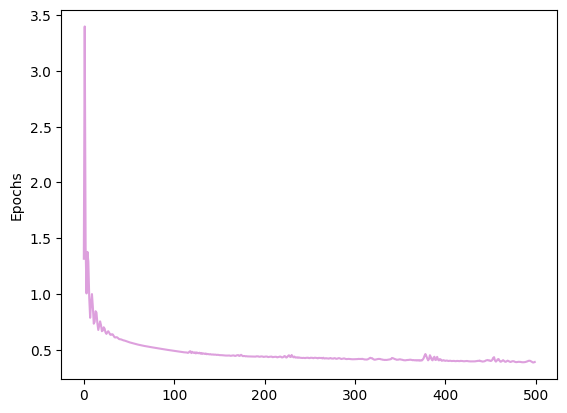

In [ ]:
losses = [i.detach().numpy() for i in final_losses]
plt.plot(range(epochs), losses, color = "plum")

plt.ylabel('Loss')
plt.ylabel('Epochs')
plt.savefig('эпохи_и_потери.png', dpi=300, bbox_inches='tight')

# Обучение модели Classifier и её метрики качества

In [ ]:
class Classifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
      
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.fc2(out)
        return out

# Определение размерностей входных данных, скрытого слоя и количества классов
input_size = 29
hidden_size = 16
num_classes = 2

# Создание экземпляра модели
model = Classifier(input_size, hidden_size, num_classes)

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 500
batch_size = 10

for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Вывод промежуточных результатов
    print(f'Эпоха [{epoch+1}/{num_epochs}], Потеря: {loss.item():.4f}')

Эпоха [1/500], Потеря: 2.0849
Эпоха [2/500], Потеря: 0.8340
Эпоха [3/500], Потеря: 0.4000
Эпоха [4/500], Потеря: 0.3658
Эпоха [5/500], Потеря: 0.3676
Эпоха [6/500], Потеря: 0.3666
Эпоха [7/500], Потеря: 0.3645
Эпоха [8/500], Потеря: 0.3619
Эпоха [9/500], Потеря: 0.3590
Эпоха [10/500], Потеря: 0.3560
Эпоха [11/500], Потеря: 0.3532
Эпоха [12/500], Потеря: 0.3505
Эпоха [13/500], Потеря: 0.3480
Эпоха [14/500], Потеря: 0.3457
Эпоха [15/500], Потеря: 0.3436
Эпоха [16/500], Потеря: 0.3416
Эпоха [17/500], Потеря: 0.3399
Эпоха [18/500], Потеря: 0.3384
Эпоха [19/500], Потеря: 0.3370
Эпоха [20/500], Потеря: 0.3357
Эпоха [21/500], Потеря: 0.3346
Эпоха [22/500], Потеря: 0.3336
Эпоха [23/500], Потеря: 0.3327
Эпоха [24/500], Потеря: 0.3319
Эпоха [25/500], Потеря: 0.3313
Эпоха [26/500], Потеря: 0.3307
Эпоха [27/500], Потеря: 0.3302
Эпоха [28/500], Потеря: 0.3297
Эпоха [29/500], Потеря: 0.3293
Эпоха [30/500], Потеря: 0.3290
Эпоха [31/500], Потеря: 0.3288
Эпоха [32/500], Потеря: 0.3285
Эпоха [33/500], П

In [ ]:
model.eval()

# Прямой проход для получения предсказаний
with torch.no_grad():
    test_outputs = model(X_test)

# Конвертация предсказаний в метки классов
_, predicted_labels = torch.max(test_outputs, 1)

# Конвертация тензоров PyTorch в списки
y_test = y_test.tolist()
predicted_labels = predicted_labels.tolist()

# Вычисление метрик
accuracy = accuracy_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Вывод результатов
print(f'Точность: {accuracy:.4f}')
print(f'Полнота: {recall:.4f}')
print(f'F1: {f1:.4f}')

Точность: 0.7922
Полнота: 0.5745
F1: 0.6279


In [ ]:
roc_auc = roc_auc_score(y_test, predicted_labels)
print(f'ROC-AUC: {roc_auc:.4f}')

ROC-AUC: 0.7312


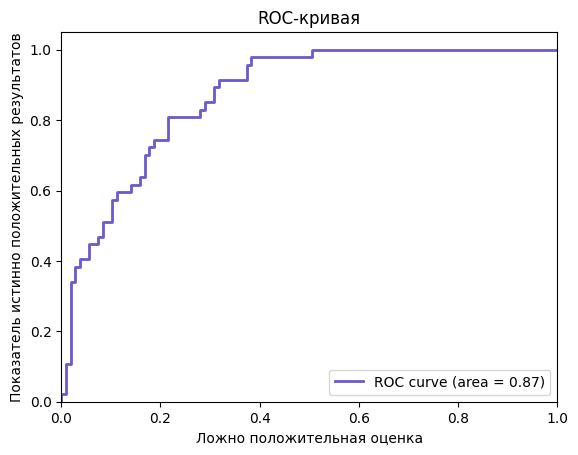

In [ ]:

# Получение предсказанных вероятностей класса 1
predicted_probabilities = torch.softmax(test_outputs, dim=1)[:, 1]

# Вычисление значений для ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Построение ROC-кривой
plt.figure()
plt.plot(fpr, tpr, color='slateblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложно положительная оценка')
plt.ylabel('Показатель истинно положительных результатов')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

# Улучшение модели ANN_model

**изменение  размерности первого скрытого слоя с 20 на 64, а второго скрытого слоя с 10 на 32**

In [ ]:
class ANN_model(nn.Module):
    def __init__(self, input_features=29, hidden1=64, hidden2=32, out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x



In [ ]:
torch.manual_seed(19)
model = ANN_model()

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
num_epochs = 500

batch_size = 10

for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        # Прямой проход (forward pass)
        outputs = model(inputs)
        loss = loss_function(outputs, labels)

        # Обратное распространение ошибки (backward pass) и оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Вывод промежуточных результатов
    print(f'Эпоха [{epoch+1}/{num_epochs}], Потеря: {loss.item():.4f}')

Эпоха [1/500], Потеря: 0.5501
Эпоха [2/500], Потеря: 0.5308
Эпоха [3/500], Потеря: 0.4557
Эпоха [4/500], Потеря: 0.4455
Эпоха [5/500], Потеря: 0.4492
Эпоха [6/500], Потеря: 0.3536
Эпоха [7/500], Потеря: 0.4802
Эпоха [8/500], Потеря: 0.3972
Эпоха [9/500], Потеря: 0.5411
Эпоха [10/500], Потеря: 0.4683
Эпоха [11/500], Потеря: 0.3484
Эпоха [12/500], Потеря: 0.3201
Эпоха [13/500], Потеря: 0.3705
Эпоха [14/500], Потеря: 0.3267
Эпоха [15/500], Потеря: 0.3055
Эпоха [16/500], Потеря: 0.2915
Эпоха [17/500], Потеря: 0.3061
Эпоха [18/500], Потеря: 0.3226
Эпоха [19/500], Потеря: 0.2989
Эпоха [20/500], Потеря: 0.2984
Эпоха [21/500], Потеря: 0.2849
Эпоха [22/500], Потеря: 0.2501
Эпоха [23/500], Потеря: 0.2445
Эпоха [24/500], Потеря: 0.3116
Эпоха [25/500], Потеря: 0.2566
Эпоха [26/500], Потеря: 0.2629
Эпоха [27/500], Потеря: 0.2986
Эпоха [28/500], Потеря: 0.2624
Эпоха [29/500], Потеря: 0.2694
Эпоха [30/500], Потеря: 0.2779
Эпоха [31/500], Потеря: 0.2861
Эпоха [32/500], Потеря: 0.2295
Эпоха [33/500], П

In [ ]:
model.eval()

# Прямой проход для получения предсказаний
with torch.no_grad():
    test_outputs = model(X_test)

# Конвертация предсказаний в метки классов
_, predicted_labels = torch.max(test_outputs, 1)

# Конвертация тензоров PyTorch в списки
y_test = y_test.tolist()
predicted_labels = predicted_labels.tolist()

# Вычисление метрик
accuracy = accuracy_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Вывод результатов
print(f'Точность: {accuracy:.4f}')
print(f'Полнота: {recall:.4f}')
print(f'F1: {f1:.4f}')

Точность: 0.7727
Полнота: 0.7021
F1: 0.6535


**добавление третьего скрытого слоя** 

In [ ]:
class ANN_model(nn.Module):
    def __init__(self, input_features=29, hidden1=20, hidden2=10, hidden3=5, out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.f_connected3 = nn.Linear(hidden2, hidden3)  # Добавлен третий скрытый слой
        self.out = nn.Linear(hidden3, out_features)
        
    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = F.relu(self.f_connected3(x))  # Проход через третий скрытый слой
        x = self.out(x)
        return x


In [ ]:
torch.manual_seed(19)
model = ANN_model()

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
num_epochs = 500

batch_size = 10

for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        # Прямой проход (forward pass)
        outputs = model(inputs)
        loss = loss_function(outputs, labels)

        # Обратное распространение ошибки (backward pass) и оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Вывод промежуточных результатов
    print(f'Эпоха [{epoch+1}/{num_epochs}], Потеря: {loss.item():.4f}')

Эпоха [1/500], Потеря: 0.5683
Эпоха [2/500], Потеря: 0.5544
Эпоха [3/500], Потеря: 0.5391
Эпоха [4/500], Потеря: 0.5746
Эпоха [5/500], Потеря: 0.5125
Эпоха [6/500], Потеря: 0.5039
Эпоха [7/500], Потеря: 0.6406
Эпоха [8/500], Потеря: 0.4481
Эпоха [9/500], Потеря: 0.4876
Эпоха [10/500], Потеря: 0.5480
Эпоха [11/500], Потеря: 0.4087
Эпоха [12/500], Потеря: 0.4129
Эпоха [13/500], Потеря: 0.4691
Эпоха [14/500], Потеря: 0.4273
Эпоха [15/500], Потеря: 0.3869
Эпоха [16/500], Потеря: 0.4157
Эпоха [17/500], Потеря: 0.3519
Эпоха [18/500], Потеря: 0.3602
Эпоха [19/500], Потеря: 0.4073
Эпоха [20/500], Потеря: 0.3532
Эпоха [21/500], Потеря: 0.4099
Эпоха [22/500], Потеря: 0.4175
Эпоха [23/500], Потеря: 0.4118
Эпоха [24/500], Потеря: 0.4131
Эпоха [25/500], Потеря: 0.3103
Эпоха [26/500], Потеря: 0.3278
Эпоха [27/500], Потеря: 0.2388
Эпоха [28/500], Потеря: 0.3594
Эпоха [29/500], Потеря: 0.2873
Эпоха [30/500], Потеря: 0.3359
Эпоха [31/500], Потеря: 0.3397
Эпоха [32/500], Потеря: 0.3288
Эпоха [33/500], П

In [ ]:
model.eval()

# Прямой проход для получения предсказаний
with torch.no_grad():
    test_outputs = model(X_test)

# Конвертация предсказаний в метки классов
_, predicted_labels = torch.max(test_outputs, 1)

# Конвертация тензоров PyTorch в списки
y_test = y_test.tolist()
predicted_labels = predicted_labels.tolist()

# Вычисление метрик
accuracy = accuracy_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Вывод результатов
print(f'Точность: {accuracy:.4f}')
print(f'Полнота: {recall:.4f}')
print(f'F1: {f1:.4f}')

Точность: 0.7857
Полнота: 0.6383
F1: 0.6452


**изменение оптимизатора на SGD и скорости обучения** 

In [ ]:
class ANN_model(nn.Module):   #модель неройнной сети 
    def __init__(self,input_features=29,hidden1=20, hidden2=10,out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features,hidden1)
        self.f_connected2 = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2,out_features)
        
    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [ ]:
torch.manual_seed(19)
model = ANN_model()

In [ ]:

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
num_epochs = 500

batch_size = 10

for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        inputs = X_train[i:i+batch_size]
        labels = y_train[i:i+batch_size]

        # Прямой проход (forward pass)
        outputs = model(inputs)
        loss = loss_function(outputs, labels)

        # Обратное распространение ошибки (backward pass) и оптимизация
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Вывод промежуточных результатов
    print(f'Эпоха [{epoch+1}/{num_epochs}], Потеря: {loss.item():.4f}')


Эпоха [1/500], Потеря: 0.5184
Эпоха [2/500], Потеря: 0.5758
Эпоха [3/500], Потеря: 0.4234
Эпоха [4/500], Потеря: 0.4044
Эпоха [5/500], Потеря: 0.4732
Эпоха [6/500], Потеря: 0.4396
Эпоха [7/500], Потеря: 0.4511
Эпоха [8/500], Потеря: 0.3950
Эпоха [9/500], Потеря: 0.4317
Эпоха [10/500], Потеря: 0.4063
Эпоха [11/500], Потеря: 0.3842
Эпоха [12/500], Потеря: 0.3462
Эпоха [13/500], Потеря: 0.3594
Эпоха [14/500], Потеря: 0.3744
Эпоха [15/500], Потеря: 0.3632
Эпоха [16/500], Потеря: 0.3802
Эпоха [17/500], Потеря: 0.3641
Эпоха [18/500], Потеря: 0.3527
Эпоха [19/500], Потеря: 0.3385
Эпоха [20/500], Потеря: 0.3598
Эпоха [21/500], Потеря: 0.3735
Эпоха [22/500], Потеря: 0.3412
Эпоха [23/500], Потеря: 0.3561
Эпоха [24/500], Потеря: 0.3551
Эпоха [25/500], Потеря: 0.3382
Эпоха [26/500], Потеря: 0.3206
Эпоха [27/500], Потеря: 0.3290
Эпоха [28/500], Потеря: 0.3357
Эпоха [29/500], Потеря: 0.3810
Эпоха [30/500], Потеря: 0.3735
Эпоха [31/500], Потеря: 0.3306
Эпоха [32/500], Потеря: 0.4005
Эпоха [33/500], П

In [ ]:
model.eval()

# Прямой проход для получения предсказаний
with torch.no_grad():
    test_outputs = model(X_test)

# Конвертация предсказаний в метки классов
_, predicted_labels = torch.max(test_outputs, 1)

# Конвертация тензоров PyTorch в списки
y_test = y_test.tolist()
predicted_labels = predicted_labels.tolist()

# Вычисление метрик
accuracy = accuracy_score(y_test, predicted_labels)
recall = recall_score(y_test, predicted_labels)
f1 = f1_score(y_test, predicted_labels)

# Вывод результатов
print(f'Точность: {accuracy:.4f}')
print(f'Полнота: {recall:.4f}')
print(f'F1: {f1:.4f}')

Точность: 0.7143
Полнота: 0.8723
F1: 0.6508


# Определение релевантных признаков

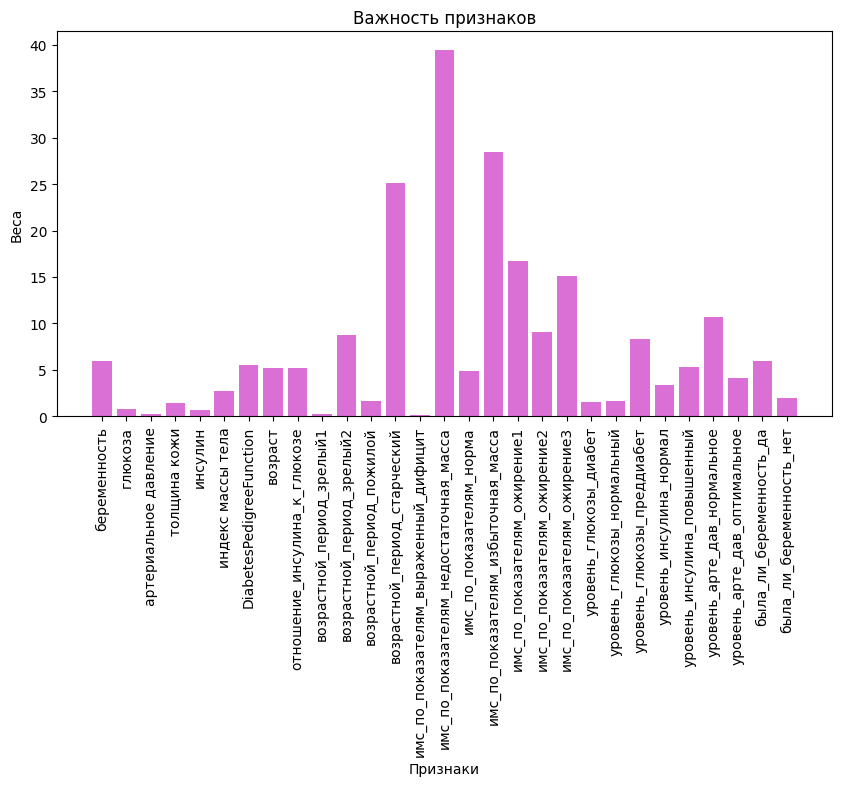

In [ ]:
feat_importances = pd.DataFrame({'feature': range(X_train.shape[1]), 'importance': np.abs(model.f_connected1.weight.detach().numpy().sum(axis=0))})
feat_importances = feat_importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,5))
plt.bar(feat_importances['feature'], feat_importances['importance'], color="orchid")
plt.title('Важность признаков')
plt.xlabel('Признаки')
plt.ylabel('Веса')
plt.xticks(range(X_train.shape[1]), X.columns, rotation=90)
plt.savefig('график_важности_признаков_по_модулю.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:

feat_importances = pd.DataFrame({'feature_name': X.columns, 'importance': model.f_connected1.weight.detach().numpy().sum(axis=0)})
feat_importances = feat_importances.sort_values(by='importance', ascending=False)
feat_importances = feat_importances.rename(columns={'feature_name': 'feature'})


feat_importances
feat_importances.to_excel('таблица_весов_признаков.xlsx', index=False)

In [ ]:
feat_importances_abs = feat_importances.copy()

In [ ]:
feat_importances_abs['importance'] = feat_importances_abs['importance'].abs()
feat_importances_abs = feat_importances_abs.sort_values(by='importance', ascending=False)
feat_importances_abs.to_excel('таблица_весов_признаков_по_модулю.xlsx', index=False)

In [ ]:
feat_importances_abs

,feature,importance
14,имс_по_показателям_недостаточная_масса,39.471592
16,имс_по_показателям_избыточная_масса,28.427588
12,возрастной_период_старческий,25.066547
17,имс_по_показателям_ожирение1,16.694593
19,имс_по_показателям_ожирение3,15.114244
25,уровень_арте_дав_нормальное,10.657737
18,имс_по_показателям_ожирение2,9.031202
10,возрастной_период_зрелый2,8.704469
22,уровень_глюкозы_преддиабет,8.359259
27,была_ли_беременность_да,5.994353
